In [53]:
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Model
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import scipy

In [2]:
data = pd.read_csv('/content/drive/My Drive/icml_face_data.csv')

In [3]:
data.head()

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [5]:
pixel_data = data[' pixels']
label_data = data['emotion']


In [6]:
len(label_data)

35887

In [7]:
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)

 

  return X

In [8]:
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
X_over_series = pd.Series(X_over.flatten())
X_over_series

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    116 115 117 118 117 58 6 10 11 11 55 84 130 16...
62919    130 132 135 127 55 24 22 1 9 14 29 33 26 30 32...
62920    220 219 218 215 220 170 51 40 41 53 70 83 85 8...
62921    67 58 51 48 50 53 48 49 50 69 78 88 98 100 102...
62922    121 121 123 53 25 37 35 22 21 53 67 77 97 107 ...
Length: 62923, dtype: object

In [10]:
X = preprocess_pixels(X_over_series)
Y = Y_over

In [14]:
Y = Y_over.reshape(Y.shape[0],1)
Y.shape

(62923, 1)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)

In [17]:
def emotion_recognition(input_shape):

  X_input = Input(input_shape)

  X = Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid')(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'same')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)


  X = MaxPooling2D((2,2))(X)

  X = Conv2D(128, (3,3), strides=(1,1), padding = 'valid')(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)

 

  X = MaxPooling2D((2,2))(X)
  X = Flatten()(X)
  X = Dense(200, activation='relu')(X)
  X = Dropout(0.6)(X)
  X = Dense(7, activation = 'softmax')(X)

  model = Model(inputs=X_input, outputs=X)

  return model










In [18]:
model = emotion_recognition((48,48,1))


In [19]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)       

In [20]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
y_train = to_categorical(Y_train, num_classes=7)

In [22]:
y_train.shape

(56630, 7)

In [23]:
y_test = to_categorical(Y_test, num_classes=7)

In [26]:
model.fit(X_train, y_train, epochs = 10, validation_data=(X_test, y_test))

Epoch 1/10
1770/1770 [==============================] - 1064s 601ms/step - loss: 0.5772 - accuracy: 0.7885 - val_loss: 0.7032 - val_accuracy: 0.7572
Epoch 2/10
1770/1770 [==============================] - 1063s 601ms/step - loss: 0.5186 - accuracy: 0.8114 - val_loss: 0.6749 - val_accuracy: 0.7680
Epoch 3/10
1770/1770 [==============================] - 1067s 603ms/step - loss: 0.4649 - accuracy: 0.8337 - val_loss: 0.6529 - val_accuracy: 0.7823
Epoch 4/10
1770/1770 [==============================] - 1068s 603ms/step - loss: 0.4151 - accuracy: 0.8525 - val_loss: 0.6774 - val_accuracy: 0.7748
Epoch 5/10
1770/1770 [==============================] - 1069s 604ms/step - loss: 0.3752 - accuracy: 0.8663 - val_loss: 0.6496 - val_accuracy: 0.7968
Epoch 6/10
1770/1770 [==============================] - 1067s 603ms/step - loss: 0.3340 - accuracy: 0.8814 - val_loss: 0.6430 - val_accuracy: 0.8106
Epoch 7/10
1770/1770 [==============================] - 1068s 603ms/step - loss: 0.3080 - accuracy: 0.8929

In [27]:
model.save_weights('/content/drive/My Drive/emotion_weights_1.hdf5')

In [28]:
model.evaluate(X_test, y_test)

197/197 [==============================] - 28s 140ms/step - loss: 0.6898 - accuracy: 0.8203


[0.68984454870224, 0.8202764987945557]

In [ ]:
preds = model.predict(X_train)

In [ ]:
pred_class = np.zeros((32298,1))
for i in range(len(preds)):
  pred_class[i] = np.argmax(preds[i])


In [ ]:
pred_class

array([[5.],
       [2.],
       [0.],
       ...,
       [2.],
       [3.],
       [2.]])

In [ ]:
y_train = np.zeros((32298,1))
for i in range(len(preds)):
  y_train[i] = np.argmax(Y_train[i])

In [ ]:
y_train

array([[5.],
       [2.],
       [0.],
       ...,
       [2.],
       [3.],
       [2.]])

In [ ]:
report = classification_report(y_train, pred_class)


In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      4453
         1.0       1.00      0.94      0.97       496
         2.0       0.98      0.95      0.96      4600
         3.0       1.00      0.98      0.99      8092
         4.0       0.88      1.00      0.93      5452
         5.0       0.97      0.99      0.98      3600
         6.0       0.98      0.95      0.97      5605

    accuracy                           0.96     32298
   macro avg       0.97      0.96      0.96     32298
weighted avg       0.97      0.96      0.96     32298



In [29]:
test_preds = model.predict(X_test)

In [30]:
len(test_preds)

6293

In [31]:
pred_test_class = np.zeros((6293,1))
for i in range(len(test_preds)):
  pred_test_class[i] = np.argmax(test_preds[i])

In [32]:
report_test = classification_report(Y_test, pred_test_class)

In [33]:
print(report_test)

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       935
           1       1.00      1.00      1.00       895
           2       0.80      0.78      0.79       880
           3       0.86      0.70      0.77       906
           4       0.69      0.72      0.71       888
           5       0.91      0.95      0.93       869
           6       0.67      0.80      0.73       920

    accuracy                           0.82      6293
   macro avg       0.83      0.82      0.82      6293
weighted avg       0.83      0.82      0.82      6293



In [44]:
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}
label_dict

{0: 'Angry',
 1: 'Disgust',
 2: 'Fear',
 3: 'Happiness',
 4: 'Sad',
 5: 'Surprise',
 6: 'Neutral'}

In [124]:
img_path = 'test3_surprise.jpg'
img = image.load_img(img_path, grayscale=True, target_size=(48,48))

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [125]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x.shape

(1, 48, 48, 1)

The predicted emotion is : Surprise


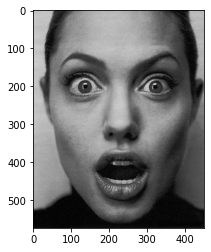

In [126]:
prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

In [115]:
img = np.fromstring(X_over_series[4], dtype='int', sep=' ')
img = img.reshape(48,48,1)

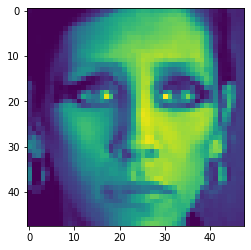

In [116]:
plt.imshow(np.array(img.reshape(48,48)))